In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y= 4 + 3 * X + np.random.randn(100, 1)

In [22]:
y[:5]

array([[7.49925017],
       [5.97136616],
       [7.9880346 ],
       [5.1731782 ],
       [6.13294039]])

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

(0, 2)

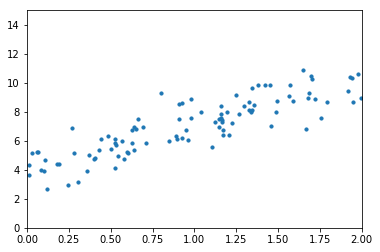

In [3]:
plt.scatter(X,y,s=10)
plt.ylim(0,15)
plt.xlim(0,2)

### The Normal Equation

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.0687624 ],
       [3.05903113]])

### Prediction

In [5]:
X_new = np.array([[0], [2]]) 
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance


y_predict = X_new_b.dot(theta_best)

y_predict

array([[ 4.0687624 ],
       [10.18682467]])

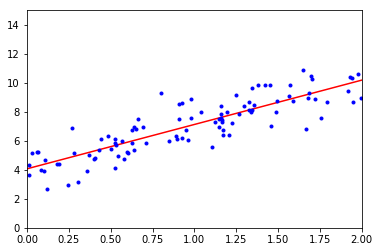

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.") 
plt.axis([0, 2, 0, 15])
plt.show()

### Same result using sklearn

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
lin_reg.intercept_

array([4.0687624])

In [13]:
lin_reg.coef_

array([[3.05903113]])

In [14]:
lin_reg.predict(X_new)

array([[ 4.0687624 ],
       [10.18682467]])

### Batch Gradient Descent

In [112]:
eta = 0.1 # learning rate 
n_iterations = 1000
m = len(X_b)

In [113]:
theta = np.random.randn(2,1) # 两行 0-1之间的随机数

In [114]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # the formula of gradient
    theta = theta - eta * gradients     # next step theta
    #print(abs(gradients))
    if abs(gradients)[0]<0.0001 and abs(gradients)[1]<0.0001:  # if the gradients small enough
        eta/=10     # decrease the learning rate
        for more in range(10):  # run ten more for new learning rate
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)      
            theta = theta - eta * gradients
        print(iteration+10)   # print the iteration times
        break
    n+=1

296


In [115]:
theta

array([[4.0684408 ],
       [3.05931661]])

### Stochastic Gradient Descent

#### Stochastic Gradient Descent using a simple learning schedule

In [121]:
n_epochs = 50 
t0, t1 = 5, 50 # learning schedule hyperparameters

In [122]:
def learning_schedule(t): 
    return t0 / (t + t1)

In [123]:
theta = np.random.randn(2,1) # random initialization

In [201]:
loss=[]
for epoch in range(n_epochs): 
    for i in range(len(X_b)):  # the number of instance
        random_index = np.random.randint(len(X_b))  # get a random number between 0 and the number of instance(randomly find one instance)
        xi = X_b[random_index:random_index+1]   # retuen a list of one train instance
        yi = y[random_index:random_index+1]    # retuen a list of one target instance
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)     # calculate the gradient for this instance
        loss_per=abs(np.squeeze(sum(abs(X_b.dot(theta) - y))/len(X_b)))  # calculate the mse for all
        loss.append(loss_per)
        eta = learning_schedule(epoch * (len(X_b)) + i)     # 0*100+i the second iterate: 1*100+i. There for the number from 0 to 5000
        # the lr from 5/(50+0) to 5/(50+5000)
        theta = theta - eta * gradients 

In [202]:
theta

array([[4.06857257],
       [3.07216978]])

#### Loss plot

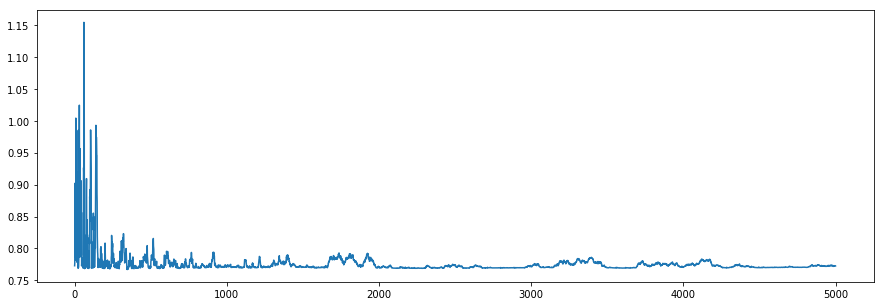

In [203]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(5000),loss)

### By sklearn

In [205]:
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1) #以0.1 开始
sgd_reg.fit(X, y.ravel())

C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

y.ravel() 使列变行

In [208]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.06344367]), array([3.04011516]))

## Polynomial Regression

In [209]:
m = 100 
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

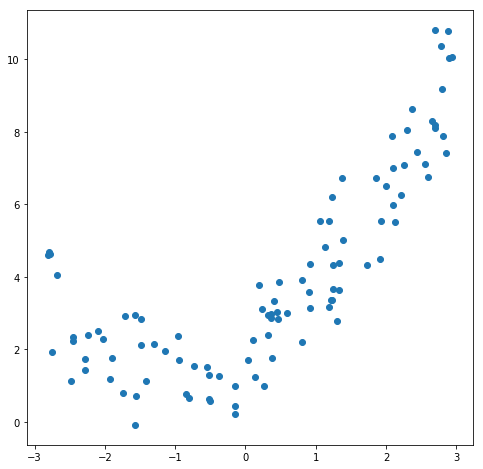

In [211]:
plt.figure(figsize=(8,8))
plt.scatter(X,y)

In [214]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X)
X[:5]

array([[ 1.19354167],
       [ 2.78535994],
       [-2.28254105],
       [ 1.21753038],
       [-0.50079616]])

In [215]:
X_poly[:5]

array([[ 1.19354167,  1.42454171],
       [ 2.78535994,  7.75823001],
       [-2.28254105,  5.20999364],
       [ 1.21753038,  1.48238023],
       [-0.50079616,  0.25079679]])

In [216]:
lin_reg = LinearRegression() 
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.97394261]), array([[1.05612802, 0.54212405]]))

### Plot learning curve

# Useful

In [218]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [221]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) #分训练和验证组
    train_errors, val_errors = [], []  #记录error
    for m in range(1, len(X_train)): # 在 m=1 到 训练集数据量
        model.fit(X_train[:m], y_train[:m]) # 训练模型
        y_train_predict = model.predict(X_train[:m]) #输出训练集预测结果
        y_val_predict = model.predict(X_val) # 数据测试集训练结果
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) # 训练集mse
        val_errors.append(mean_squared_error(y_val_predict, y_val)) # 测试集mse
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

#### With the train_set grow , the chages of error for train and test

Train red, test blue

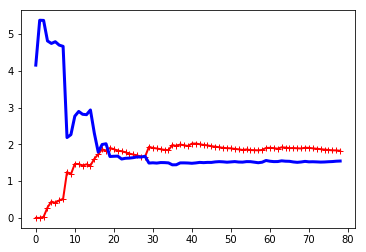

In [227]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

#### the learning curves of polynomial model

By using pipeline

(0, 3)

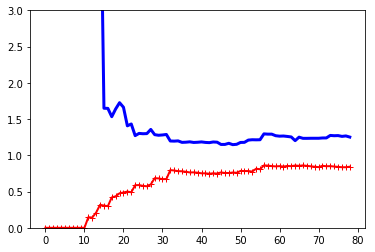

In [232]:
from sklearn.pipeline import Pipeline 
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))
plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0,3)

### Ridge Regressio(Tikhonov regularization)

####  perform Ridge Regression with Scikit-Learn using a closed-form solu‐ tion

In [233]:
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=1, solver="cholesky") 
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.37444626]])

#### Using SGD (same to set penalty as l2)

In [234]:
sgd_reg = SGDRegressor(penalty="l2") 
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.71954418])

## Lasso Regression(Least Absolute Shrinkage and Selection Operator Regression)

### Scikit-Learn example using the Lasso class

In [235]:
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha=0.1) 
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.33961751])

#### Using SGD (same to set penalty as l1)


In [236]:
sgd_reg = SGDRegressor(penalty="l1") 
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.72487511])